In the [problem for the education minister]({{ site.baseurl
}}/chapters/10/havana_math) we had a sample of fast-track-marked exams from
2019, and we found that the mean mark was 54.51.  We wondered what we could say
about the eventual mean of the marks for all 8000 or so students.

After a bit of development, we found, in the [reverse probability with bars]({{
site.baseurl }}/chapters/10/bayes_bars) page, that we could use some
probability calculations to draw conclusions about the state of the world, from
some result.  In that page, we calculated the probability of the state of the
world (a box we have been given) from a result (drawing a red ball).

Now we want to draw a conclusion about the state of the world (the eventual
mean of all the 2019 exams) from a result (the mean of the fast-marked sample
of 50 2019 exams).

We will call the 50 fast-track-marked exams the *sample*.  When the 2019
marking is finished, we will have around 8000 marks.  We will call this the
*population*.  We want to draw conclusions about the *population* from the
*sample*.   In particular we want to draw conclusions about the population mean
from the sample mean.

Let us start with the following problem:

**Problem 1**: What is the probability that we will observe a *sample* mean of
*around* 54.51, given that the *population* mean is 62.25.

Referring back to our box and ball problem, this probability is the equivalent
of the probability of getting a red ball from a given box.  Given a state of
the world (the population mean) what the is the probability of the result (the
sample mean).  Once we have probabilities like these, we will be able to use
the logic you have already seen to get the *reverse* probability - how likely
was any particular state of the world (population mean), given the result (the
sample mean).

Returning to our mathematics exam problem: how will we calculate the
probability of a sample mean of around 54.51, given a population mean of 62.25?

As usual, this is a problem of *sampling*.  If the mean of the population is
62.25, and we draw a sample of 50 marks, then the mean of the sample will be
vary somewhat depending on the sample. That is, the *sample mean* will be 62.25
plus or minus a bit.  As usual, we need to quantify what we mean by "a bit".

For example, remember the population of 2018 marks, that do have a mean of
around 62.25.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
havana_2018 = pd.read_csv('havana_math_2018.csv')
marks_2018 = havana_2018['mark'].dropna()
marks_2018.mean()

65.25609088420477

To get the *sampling distribution* of the mean of a sample of 50, we would have
to calculate the mean for every possible sample of 50 values from the 8000 or
so marks.  As usual, we make do with an *estimate* of the sampling distribution
by taking many thousands of samples.

In [3]:
# Take 10000 samples, calculate their means.
n_iters = 10000
sample_means = np.zeros(n_iters)
for i in np.arange(n_iters):
    sample = np.random.choice(marks_2018, size=50, replace=False)
    sample_means[i] = np.mean(sample)
sample_means[:5]

array([68.28, 60.9 , 68.08, 68.82, 70.  ])

The next cell has a histogram of the sampling distribution.  Notice that we
have asked `plt.hist` to break the histogram into bins with *edges*
`np.arange(50, 80, 0.5)`.  This means that each bin covers a range of 0.5 units
--- so the first bin in the histogram gives the counts of all sample means that
were between 50 and 50.5 (excluding 50.5), the second bin covers 50.5 up to
(not including) 51, and so on.

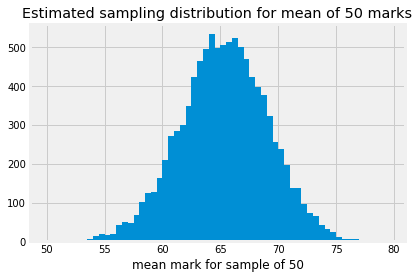

In [4]:
bin_edges = np.arange(50, 80, 0.5)
plt.hist(sample_means, bins=bin_edges)
plt.xlabel('mean mark for sample of 50')
plt.title('Estimated sampling distribution for mean of 50 marks');

We can use `plt.hist` to give us the counts for each of these bins, by storing the values that `plt.hist` returns, like this:

array([  0.,   0.,   0.,   1.,   4.,   1.,   2.,   7.,  13.,  18.,  15.,
        18.,  41.,  49.,  46.,  67., 102., 125., 128., 164., 209., 272.,
       285., 299., 349., 423., 465., 496., 534., 499., 507., 515., 523.,
       502., 471., 424., 397., 376., 323., 255., 238., 196., 138., 137.,
        97.,  73.,  64.,  42.,  33.,  24.,  10.,   5.,   7.,   5.,   1.,
         3.,   1.,   1.,   0.])

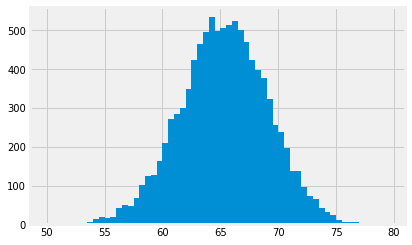

In [5]:
# Store the values that plt.hist returns.
hist_vals = plt.hist(sample_means, bins=bin_edges)
# Counts per bin is the first returned value.
counts = hist_vals[0]
counts

As we saw in the page on [using minimize]({{ site.baseurl
}}/chapters/08/using_minimize#unpacking), we can get this value a little more
neatly by *unpacking* the return values from `plt.hist`, like this:

array([  0.,   0.,   0.,   1.,   4.,   1.,   2.,   7.,  13.,  18.,  15.,
        18.,  41.,  49.,  46.,  67., 102., 125., 128., 164., 209., 272.,
       285., 299., 349., 423., 465., 496., 534., 499., 507., 515., 523.,
       502., 471., 424., 397., 376., 323., 255., 238., 196., 138., 137.,
        97.,  73.,  64.,  42.,  33.,  24.,  10.,   5.,   7.,   5.,   1.,
         3.,   1.,   1.,   0.])

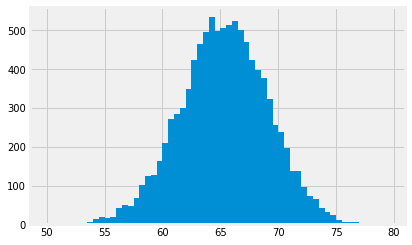

In [6]:
# Store the values that plt.hist returns.
# We will only use the first of these.
counts, edges, patches = plt.hist(sample_means, bins=bin_edges)
# Counts per bin (again):
counts

These are the counts for how many of the 10000 samples we took had a mean
between the bin edges.  For example, the left (lower) edge of the bin at index
20 is:

In [7]:
bin_edges[20]

60.0

This the bin counting all the sample mean values between 60 and 60.5.  The
counts in that that bin are:

In [8]:
counts[20]

209.0

This is the count of the 10000 sample means from our estimated sampling
distribution, that were from 60 up to, but not including, 60.5.

By dividing the counts by the number of samples, we get the proportion of
samples that fall in this range:

In [9]:
proportions = counts / 10000
proportions

array([0.    , 0.    , 0.    , 0.0001, 0.0004, 0.0001, 0.0002, 0.0007,
       0.0013, 0.0018, 0.0015, 0.0018, 0.0041, 0.0049, 0.0046, 0.0067,
       0.0102, 0.0125, 0.0128, 0.0164, 0.0209, 0.0272, 0.0285, 0.0299,
       0.0349, 0.0423, 0.0465, 0.0496, 0.0534, 0.0499, 0.0507, 0.0515,
       0.0523, 0.0502, 0.0471, 0.0424, 0.0397, 0.0376, 0.0323, 0.0255,
       0.0238, 0.0196, 0.0138, 0.0137, 0.0097, 0.0073, 0.0064, 0.0042,
       0.0033, 0.0024, 0.001 , 0.0005, 0.0007, 0.0005, 0.0001, 0.0003,
       0.0001, 0.0001, 0.    ])

For example, here is the proportion of sample means that fell between 60 and 60.5:

In [10]:
proportions[20]

0.0209

In other words, given this estimated sampling distribution, for this world with
a mean of 62.25, the probability of any one sample mean being between 60 and
60.5 is:

In [11]:
proportions[20]

0.0209

Now we are in a position to answer our intermediate question:

**Problem 1**: What is the probability that we will observe a *sample* mean of
*around* 54.51, given that the *population* mean is 62.25.

One difficulty with this question is that we do not know what the sampling
distribution would be for this hypothetical 2019 full set of marks, where the
population mean is 62.25.  For the moment, we will assume that the sampling
distribution is exactly the same as it was in 2018; this is the sampling
distribution we have already been using.

We find the bin corresponding to the sample mean of 54.51; this is the bin with
the left (lower) edge of 54.5.   It turns out this is the bin at index 9.

In [12]:
bin_54p5 = np.where(bin_edges == 54.5)
bin_54p5

(array([9]),)

Look back at [where and argmin]({{ site.baseurl
}}/chapters/08/where_and_argmin) for this trick of using `np.where` to find the
index.

We get the proportion at that index, to give the probability that we will see a
sample mean between 54.5 and 55:

In [13]:
p_around_54p5 = proportions[bin_54p5]
p_around_54p5

array([0.0018])